# Latent Dungeon

We want to generate a dungeon, simulating a process in which dice were rolled to determine the number of rooms, and then each room and corridor generated, but we don't want to know the number of rooms in advance! In other words, this variable (and possibly others) are latent variables that we try to marginalize probabilities over.

In [29]:
from rpg_utils import distributions as dist
from rpg_utils import tables
from rpg_utils.tables import generate_table
from importlib import reload
reload(dist)
reload(tables)

from rpg_utils.distributions import Roll

import numpy as np
from matplotlib import pyplot as plt
from tabulate import tabulate

In [2]:
def plot_distribution(d: dist.DiscreteDistribution | dist.LastRoomProbability):
    p = d.p
    min_value = d.min_value if isinstance(d, dist.DiscreteDistribution) else d.min_rooms
    max_value = min_value + len(p)

    r = np.arange(min_value, max_value)
    
    plt.plot(r, p)
    plt.show()

# Generate Distributions

In [190]:
roll_dist = dist.compute_sum_probabilities(Roll(2, 20, 10))

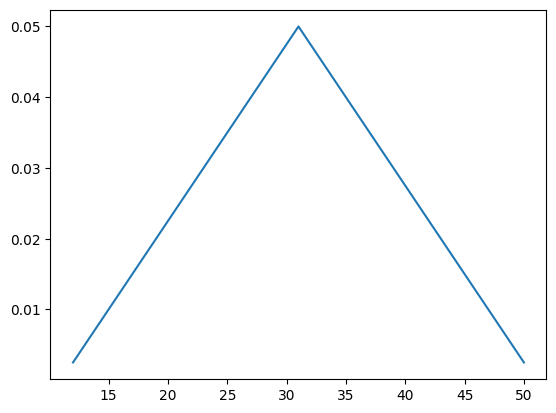

In [191]:
plot_distribution(roll_dist)

In [192]:
last_room_prob = dist.compute_last_room_probability(roll_dist)

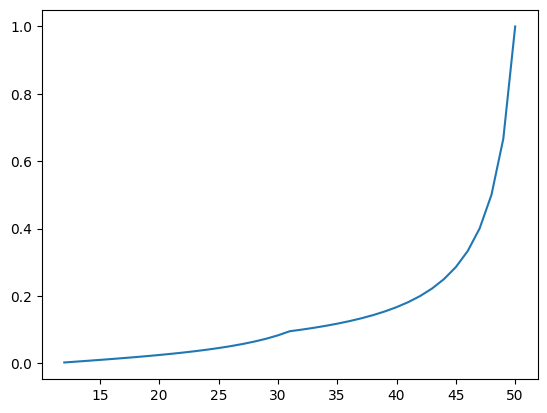

In [193]:
plot_distribution(last_room_prob)

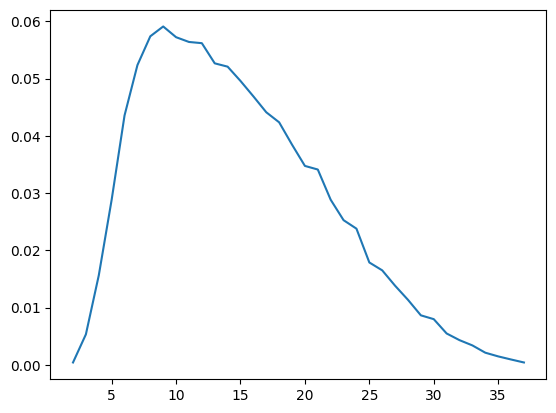

In [194]:
split1 = dist.compute_probabilities_after_split(roll_dist, 0.2, 0.8)
plot_distribution(split1)

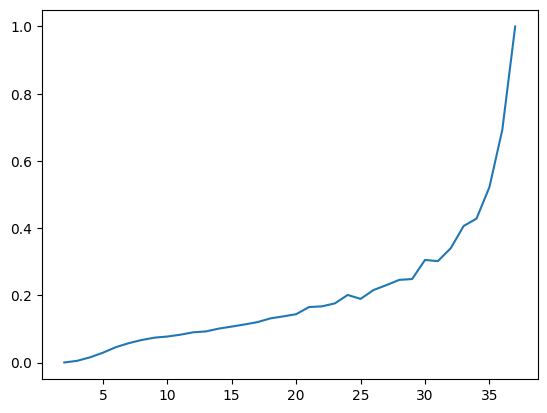

In [195]:
last_room_prob_s1 = dist.compute_last_room_probability(split1)
plot_distribution(last_room_prob_s1)

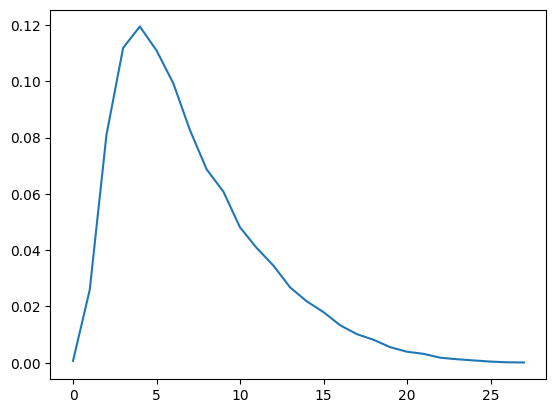

In [196]:
split2 = dist.compute_probabilities_after_split(split1)
last_room_prob_s2 = dist.compute_last_room_probability(split2)
plot_distribution(split2)

# Generate Last Room Probs

In [206]:
roll = Roll(3, 20, 15)
roll_dist = dist.compute_sum_probabilities(roll)
last_dist = roll_dist
last_room_probs = []

for i in range(4):
    lrp = dist.compute_last_room_probability(last_dist)
    lrp.quantize(0.01)
    last_room_probs.append(lrp)

    last_dist = dist.compute_probabilities_after_split(last_dist)

# Print Table

In [207]:
min_rooms = split1.min_value

table = []

for num_rooms in range(roll_dist.max_value + 1):

    row = [num_rooms]
    
    for num_splits, lrp in enumerate(last_room_probs):
        if num_rooms < lrp.min_rooms:
            row.append(0)
        elif num_rooms > lrp.max_rooms:
            row.append(100)
        else:
            pct = lrp[num_rooms] * 100
            row.append(pct)

    if all(pct == 0 for pct in row[1:]):
        # in no conditions it ends here
        continue
        
    table.append(row)

In [37]:
roll = Roll(6, 10, 20)
probs = generate_last_room_probabilities(roll)
table = generate_table(probs)

In [38]:
print(table)

\begin{tabular}{rrrrr}
\toprule
   \# Rooms &   No Splits &   One Split &   Two Splits &   Three Splits \\
\midrule
         0 &           0 &           0 &            0 &              1 \\
         1 &           0 &           0 &            0 &              7 \\
         2 &           0 &           0 &            1 &             15 \\
         3 &           0 &           0 &            3 &             18 \\
         4 &           0 &           0 &            5 &             20 \\
         5 &           0 &           0 &            7 &             21 \\
         6 &           0 &           0 &            8 &             21 \\
         7 &           0 &           0 &           10 &             21 \\
         8 &           0 &           1 &           10 &             21 \\
         9 &           0 &           1 &           11 &             23 \\
        10 &           0 &           3 &           11 &             22 \\
        11 &           0 &           3 &           11 &             23